Cancellation statistic

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.ticker import FuncFormatter
%matplotlib inline

Cancellation Rate

Check-Out    75166
Canceled     43017
No-Show       1207
Name: Status, dtype: int64


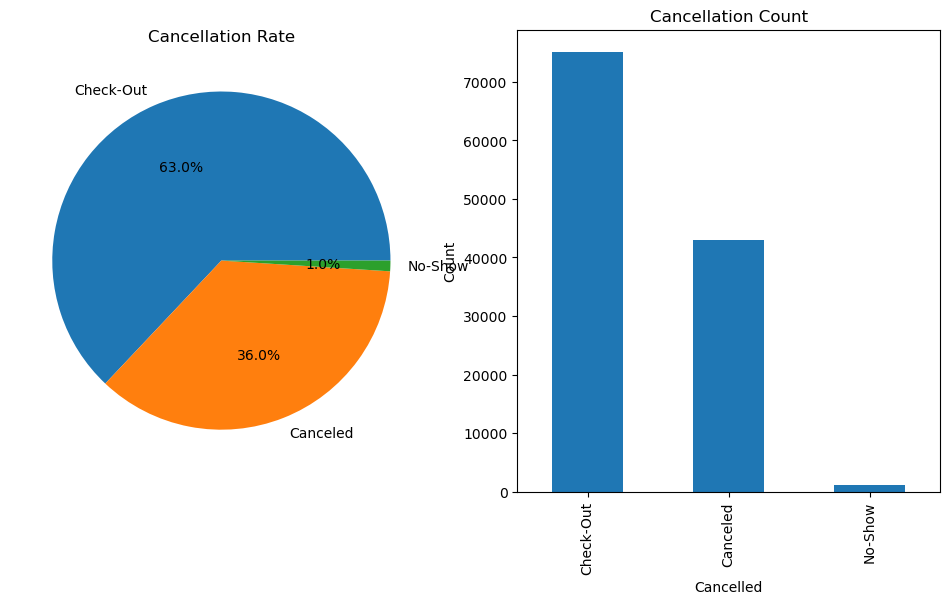

In [64]:
df = pd.read_csv('Hotelreservation.csv')

status = df['Status'].value_counts()
print(status)

fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].pie(status, labels = status.index, autopct='%1.1f%%')
ax[0].set_title('Cancellation Rate')

status.plot(kind='bar', ax=ax[1])
ax[1].set_title('Cancellation Count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Cancelled')

plt.show()

Mean and Median Revenue for Top 10 Countries with Highest Mean Revenue

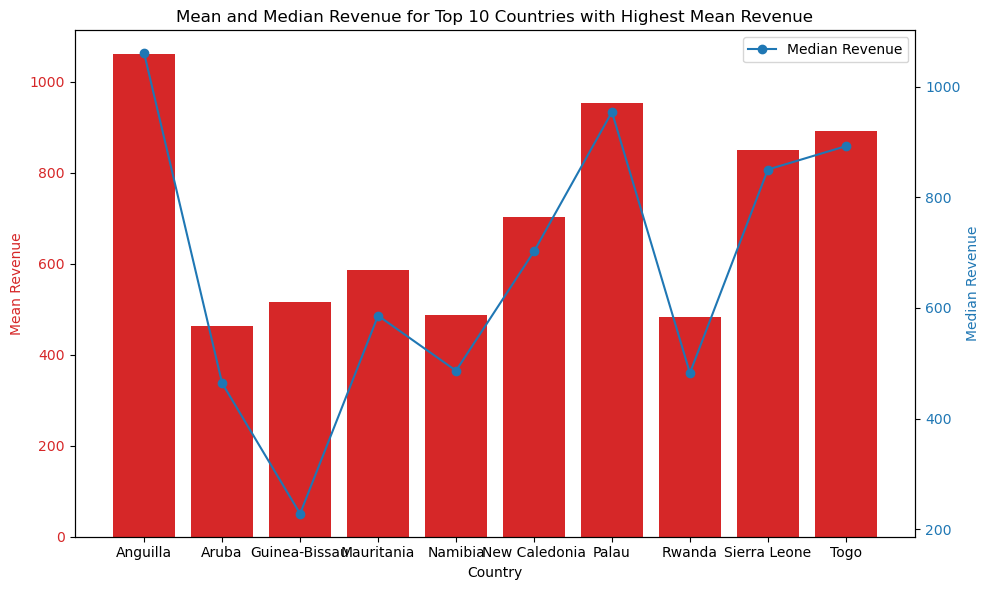

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Hotelreservation.csv')

df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

revenue_by_country = df.groupby('Country')['Revenue'].agg(['mean', 'median'])
top_10_countries = revenue_by_country['mean'].nlargest(10)
df_top_10_countries = df[df['Country'].isin(top_10_countries.index)]
revenue_by_country_top_10 = df_top_10_countries.groupby('Country')['Revenue'].agg(['mean', 'median'])

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.bar(revenue_by_country_top_10.index, revenue_by_country_top_10['mean'], color=color)
ax1.set_xlabel('Country')
ax1.set_ylabel('Mean Revenue', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(revenue_by_country_top_10.index, revenue_by_country_top_10['median'], color=color, marker='o', label='Median Revenue')
ax2.set_ylabel('Median Revenue', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Mean and Median Revenue for Top 10 Countries with Highest Mean Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Revenue Loss by Year

Year
2015   -1499626.32
2016   -5567375.50
2017   -6055898.27
Name: Revenue Loss, dtype: float64


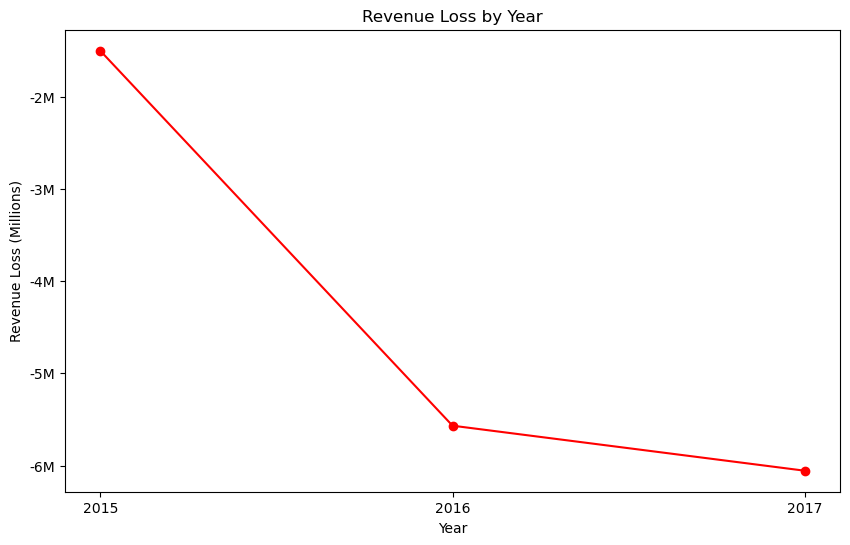

In [66]:
df = pd.read_csv('Hotelreservation.csv')

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Year'] = df['Arrival Date'].dt.year

df['Revenue Loss'] = df['Revenue Loss'].replace({'\$': '', ',': ''}, regex=True).astype(float)

revenueLossYear = df.groupby('Year')['Revenue Loss'].sum()
print(revenueLossYear)
revenueLossYear = revenueLossYear.sort_index()

def millions_formatter(x, pos):
    return f'{x / 10**6:.0f}M'

plt.figure(figsize=(10, 6))
revenueLossYear.plot(marker='o', color='red')
plt.title('Revenue Loss by Year')
plt.xlabel('Year')
plt.xticks([2015, 2016, 2017])
plt.ylabel('Revenue Loss (Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(False)
plt.show()

Distribution of Average Daily Revenue

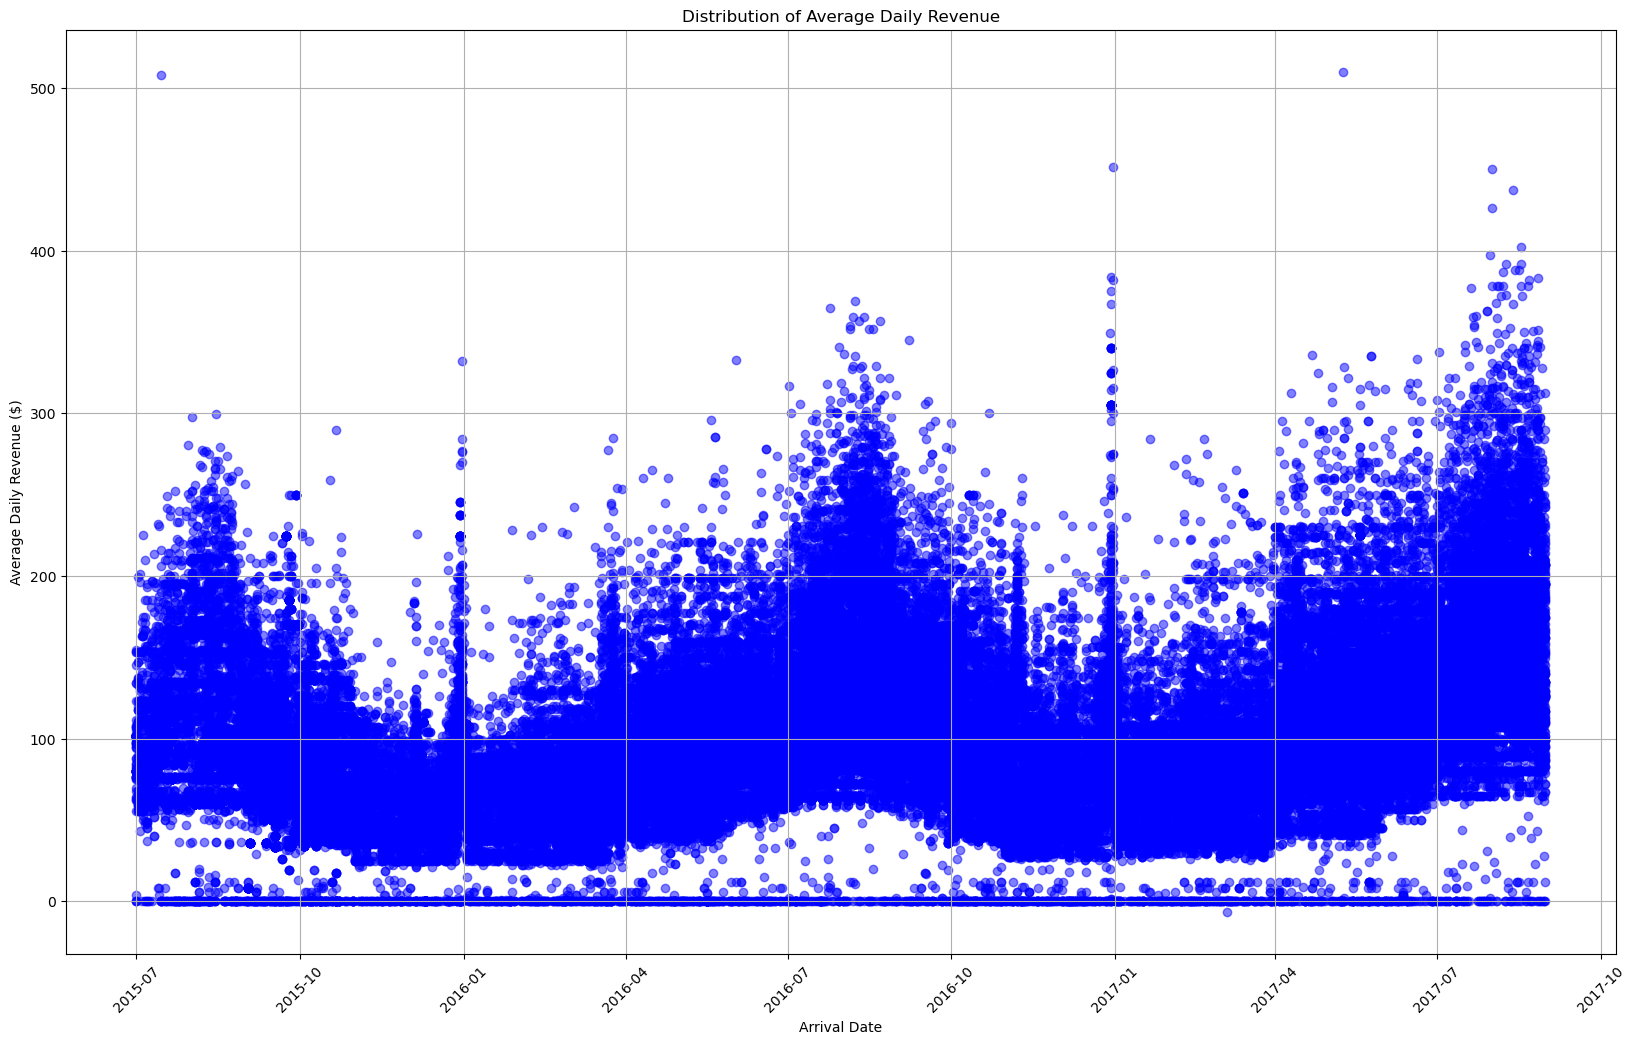

In [67]:
df = pd.read_csv('Hotelreservation.csv')

# Remove the dollar sign from "Avg Daily" and convert to float
df['Avg Daily Rate'] = df['Avg Daily Rate'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# FILTERED OUTLIER
df = df[df['Avg Daily Rate'] <= 1000]
# Convert "Arrival Date" to datetime format
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])

# Plotting the scatter plot
plt.figure(figsize=(20, 12))
plt.scatter(df['Arrival Date'], df['Avg Daily Rate'], color='blue', alpha=0.5)
plt.title('Distribution of Average Daily Revenue')
plt.xlabel('Arrival Date')
plt.ylabel('Average Daily Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Revenue by Customer Type and Arrival Date

<Figure size 1200x600 with 0 Axes>

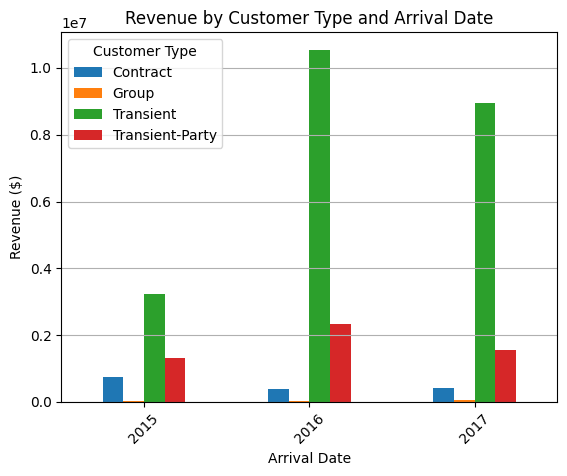

In [3]:
df = pd.read_csv('./datasets/Hotelreservation.csv')

df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Year'] = df['Arrival Date'].dt.year
df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

revenue_by_date_customer = df.groupby(['Year', 'Customer Type'])['Revenue'].sum().unstack()

plt.figure(figsize=(12, 6))
revenue_by_date_customer.plot(kind='bar', stacked=False)
plt.title('Revenue by Customer Type and Arrival Date')
plt.xlabel('Arrival Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.grid(axis='y')
plt.show()

In [4]:
revenue_by_date_customer

Customer Type,Contract,Group,Transient,Transient-Party
Year,,,,
2015,745675.88,36291.86,3219035.78,1317486.72
2016,391472.97,24733.59,10540184.59,2346834.55
2017,418040.28,62329.65,8937593.51,1560918.06


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.bar(revenue_by_date_customer, )


revenue_by_date_customer = df.groupby(['Year', 'Customer Type'])['Revenue'].sum().unstack()
